In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json, glob

from sklearn.metrics import accuracy_score
from scipy import stats

In [15]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=20)

In [16]:
def ttest(res_1,res_2):
    stat, p_value = stats.ttest_ind(res_1, res_2)
    print("p value",p_value)
    return p_value

def significance_level(p_value):
    if p_value > 0.1:
        level = None
    elif (p_value <= 0.1) and (p_value > 0.05):
        level = '.'
    elif (p_value <= 0.05) and (p_value > 0.01):
        level = '*'
    elif (p_value <= 0.01) and (p_value > 0.001):
        level = '**'
    else:
        level = '***'
    return level

def add_bar(x_1,x_2,res_1,res_2,y,ax):
    """
    model_1,model_2 : int of the model tested
    ax : axis from matplotlib figure
    """
    ax.plot([x_1,x_1],[y+1,y+3],'k')
    ax.plot([x_1,x_2],[y+3,y+3],'k')
    ax.plot([x_2,x_2],[y+3,y+1],'k')

    ax.text((x_2-x_1)/2+x_1, y+3, significance_level(ttest(res_1,res_2)),
         {'color': 'black', 'fontsize': 14, 'ha': 'center', 'va': 'center',
          'bbox': dict( fc="white", ec="white", pad=2)})
    return y+5

In [21]:
names = ['MAR_RESNET34_CROPPED_256_borehole_train','MAR_RESNET18_PADDED_256_borehole_train','MAR_RESNET18_PADDED_128_borehole_train','MAR_RESNET34_PADDED_256_borehole_train','MAR_RESNET34_RESIZED_256_borehole_train']

validation = {}
for name in names:
    validation[name] = []
    for path in glob.glob(f'../Models/outputs/{name}/model_logs_*.json'):
        with open(path) as file:
            valid_acc = json.load(file)

            validation[name].append(valid_acc['train_evolution'][-1][-1]['Valid Accuracy'])

In [22]:
validation

{'MAR_RESNET34_CROPPED_256_borehole_train': [0.8740234375,
  0.8828125,
  0.888671875],
 'MAR_RESNET18_PADDED_256_borehole_train': [0.8603515625,
  0.8701171875,
  0.861328125],
 'MAR_RESNET18_PADDED_128_borehole_train': [0.8232421875,
  0.7939453125,
  0.8203125],
 'MAR_RESNET34_PADDED_256_borehole_train': [0.8544921875,
  0.8515625,
  0.8583984375],
 'MAR_RESNET34_RESIZED_256_borehole_train': [0.8583984375,
  0.86328125,
  0.8681640625]}

p value 0.06993398937467481
p value 0.004521053101246598
p value 0.0685871056241441
p value 0.006350438308381775


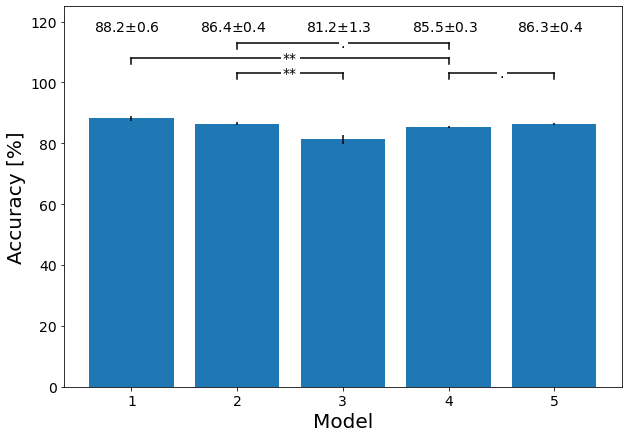

In [23]:
fig, ax = plt.subplots(figsize=(10,7))

pos = np.arange(1,6)

ax.bar(
    x=pos,
    height=pd.DataFrame.from_dict(validation)[names].mean(axis=0).values * 100,
    yerr=pd.DataFrame.from_dict(validation)[names].std(axis=0).values * 100
    ) 

tests = [
    ("MAR_RESNET34_RESIZED_256_borehole_train","MAR_RESNET34_PADDED_256_borehole_train"),
    ("MAR_RESNET34_PADDED_256_borehole_train","MAR_RESNET34_CROPPED_256_borehole_train"),
    ("MAR_RESNET34_PADDED_256_borehole_train","MAR_RESNET18_PADDED_256_borehole_train"),
    ("MAR_RESNET18_PADDED_256_borehole_train","MAR_RESNET18_PADDED_128_borehole_train")
]

y = 100 # where to start the bar
for i_, (model_1, model_2) in enumerate(np.array(tests)[[0,1,2]]) :

    x_1 = [names.index(i) for i in names if i == model_1][0] + 1
    x_2 = [names.index(i) for i in names if i == model_2][0] + 1

    res_1 = validation[model_1]
    res_2 = validation[model_2]

    y = add_bar(x_1,x_2,res_1,res_2,y,ax=ax)

y = 100 # where to start the bar
for i_, (model_1, model_2) in enumerate(np.array(tests)[[3]]) :

    x_1 = [names.index(i) for i in names if i == model_1][0] + 1
    x_2 = [names.index(i) for i in names if i == model_2][0] + 1

    res_1 = validation[model_1]
    res_2 = validation[model_2]

    y = add_bar(x_1,x_2,res_1,res_2,y,ax=ax)

for i_, model in enumerate(names):
    plt.text(
        pos[i_]-0.35, 
        117, 
        f"{np.round(np.mean(validation[model])*100,1)}$\pm${np.round(np.std(validation[model])*100,1)}",
        fontdict={'fontsize':14})
plt.ylabel('Accuracy [%]')
plt.xlabel('Model') 

plt.ylim(0, 125)
plt.savefig("../FiguresPaper/model_selection_1.png",bbox_inches='tight')

### Laboratories

In [26]:
names = ['MAR_RESNET34_CROPPED_256_lab_train','MAR_RESNET18_PADDED_256_lab_train','MAR_RESNET18_PADDED_128_lab_train','MAR_RESNET34_PADDED_256_lab_train','MAR_RESNET34_RESIZED_256_lab_train']

validation = {}
for name in names:
    validation[name] = []
    for path in glob.glob(f'../Models/outputs/{name}/model_logs_*.json'):
        with open(path) as file:
            valid_acc = json.load(file)

            validation[name].append(valid_acc['train_evolution'][-1][-1]['Valid Accuracy'])

In [28]:
validation

{'MAR_RESNET34_CROPPED_256_lab_train': [0.9560546875,
  0.9169921875,
  0.9052734375],
 'MAR_RESNET18_PADDED_256_lab_train': [0.9384765625, 0.9189453125, 0.921875],
 'MAR_RESNET18_PADDED_128_lab_train': [0.9287109375, 0.90234375, 0.8994140625],
 'MAR_RESNET34_PADDED_256_lab_train': [0.943359375,
  0.9208984375,
  0.9189453125],
 'MAR_RESNET34_RESIZED_256_lab_train': []}

ValueError: arrays must all be same length

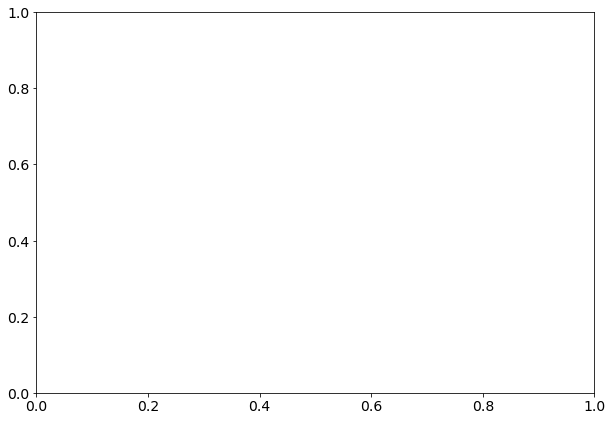

In [27]:
fig, ax = plt.subplots(figsize=(10,7))

pos = np.arange(1,6)

ax.bar(
    x=pos,
    height=pd.DataFrame.from_dict(validation)[names].mean(axis=0).values * 100,
    yerr=pd.DataFrame.from_dict(validation)[names].std(axis=0).values * 100
    ) 

tests = [
    ("MAR_RESNET34_RESIZED_256_lab_train","MAR_RESNET34_PADDED_256_lab_train"),
    ("MAR_RESNET34_PADDED_256_lab_train","MAR_RESNET34_CROPPED_256_lab_train"),
    ("MAR_RESNET34_PADDED_256_lab_train","MAR_RESNET18_PADDED_256_lab_train"),
    ("MAR_RESNET18_PADDED_256_lab_train","MAR_RESNET18_PADDED_128_lab_train")
]

y = 100 # where to start the bar
for i_, (model_1, model_2) in enumerate(np.array(tests)[[0,1,2]]) :

    x_1 = [names.index(i) for i in names if i == model_1][0] + 1
    x_2 = [names.index(i) for i in names if i == model_2][0] + 1

    res_1 = validation[model_1]
    res_2 = validation[model_2]

    y = add_bar(x_1,x_2,res_1,res_2,y,ax=ax)

y = 100 # where to start the bar
for i_, (model_1, model_2) in enumerate(np.array(tests)[[3]]) :

    x_1 = [names.index(i) for i in names if i == model_1][0] + 1
    x_2 = [names.index(i) for i in names if i == model_2][0] + 1

    res_1 = validation[model_1]
    res_2 = validation[model_2]

    y = add_bar(x_1,x_2,res_1,res_2,y,ax=ax)

for i_, model in enumerate(names):
    plt.text(
        pos[i_]-0.35, 
        117, 
        f"{np.round(np.mean(validation[model])*100,1)}$\pm${np.round(np.std(validation[model])*100,1)}",
        fontdict={'fontsize':14})
plt.ylabel('Accuracy [%]')
plt.xlabel('Model') 

plt.ylim(0, 125)
#plt.savefig("../FiguresPaper/model_selection_1.png",bbox_inches='tight')

p value 0.48158486968195835
p value 8.443997352109662e-06
p value 0.34947827166710177
p value 0.004875680674273119


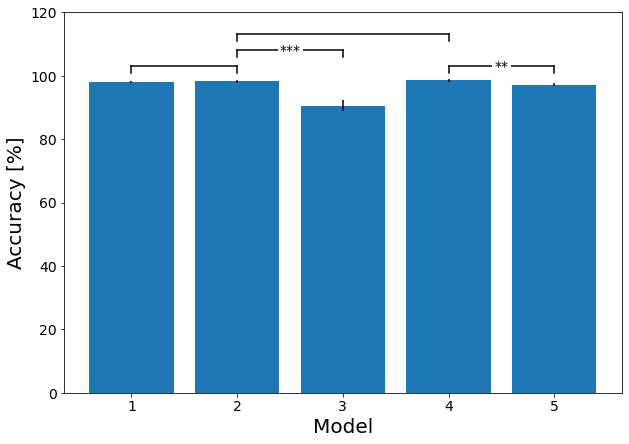

In [26]:
fig, ax = plt.subplots(figsize=(10,7))

pos = np.arange(1,6)

ax.bar(
    x=pos,
    height=pd.DataFrame.from_dict(dict_acc)[lists].mean(axis=0).values * 100,
    yerr=pd.DataFrame.from_dict(dict_acc)[lists].std(axis=0).values * 100
    ) 

tests = [
    ("MAR_RESNET34_RESIZED_256_ALL_NEW","MAR_RESNET34_PADDED_256_ALL_NEW"),
    ("MAR_RESNET34_PADDED_256_ALL_NEW","MAR_RESNET34_CROPPED_256_ALL_NEW"),
    ("MAR_RESNET34_PADDED_256_ALL_NEW","MAR_RESNET18_PADDED_256_ALL_NEW"),
    ("MAR_RESNET18_PADDED_256_ALL_NEW","MAR_RESNET18_PADDED_128_ALL_NEW")
]

y = 100 # where to start the bar
for i_, (model_1, model_2) in enumerate(np.array(tests)[[0,1,2]]) :

    x_1 = [lists.index(i) for i in lists if i == model_1][0] + 1
    x_2 = [lists.index(i) for i in lists if i == model_2][0] + 1

    res_1 = dict_acc[model_1]
    res_2 = dict_acc[model_2]

    y = add_bar(x_1,x_2,res_1,res_2,y,ax=ax)

y = 100 # where to start the bar
for i_, (model_1, model_2) in enumerate(np.array(tests)[[3]]) :

    x_1 = [lists.index(i) for i in lists if i == model_1][0] + 1
    x_2 = [lists.index(i) for i in lists if i == model_2][0] + 1

    res_1 = dict_acc[model_1]
    res_2 = dict_acc[model_2]

    y = add_bar(x_1,x_2,res_1,res_2,y,ax=ax)

plt.ylabel('Accuracy [%]')
plt.xlabel('Model') 

plt.ylim(0, 120)
plt.savefig("../FiguresPaper/model_selection_2.png",bbox_inches='tight')